In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Cleaning and Manipulation

In [2]:
df1=pd.read_csv('Details.csv')
df2=pd.read_csv('Orders.csv')

In [3]:
df1.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [4]:
df2.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [5]:
df=df1.merge(df2,on='Order ID',how='inner')

In [6]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-25681,1625,-77,3,Electronics,Phones,EMI,04-06-2018,Bhawna,Madhya Pradesh,Indore
2,B-25681,523,204,7,Clothing,Trousers,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
3,B-25681,44,-3,1,Clothing,Saree,Debit Card,04-06-2018,Bhawna,Madhya Pradesh,Indore
4,B-25681,243,-14,2,Furniture,Chairs,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 140.6+ KB


In [8]:
pd.isnull(df).sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [9]:
# changed datatype from object to datetime
df['Order Date']=pd.to_datetime(df['Order Date'])

In [10]:
# Added year month & day columns in dataframe
d=pd.DatetimeIndex(df['Order Date'])
df['Year']=d.year
df['Month']=d.month
df['Day']=d.day
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year,Month,Day
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4,6
1,B-25681,1625,-77,3,Electronics,Phones,EMI,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4,6
2,B-25681,523,204,7,Clothing,Trousers,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4,6
3,B-25681,44,-3,1,Clothing,Saree,Debit Card,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4,6
4,B-25681,243,-14,2,Furniture,Chairs,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4,6


In [14]:
# df.describe()

In [13]:
df[['Amount','Profit','Quantity']].describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


# Data Exploratory

In [15]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City', 'Year',
       'Month', 'Day'],
      dtype='object')

## State

In [25]:
state_prof=df.groupby(['State'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)

In [26]:
state_prof

,State,Profit
10,Madhya Pradesh,7382
11,Maharashtra,6963
17,Uttar Pradesh,3358
4,Gujarat,3001
16,Tamil Nadu,2602
9,Kerala,2435
18,West Bengal,2074
2,Delhi,1958
1,Bihar,1787
6,Himachal Pradesh,1662


### Top 5 States by Profit

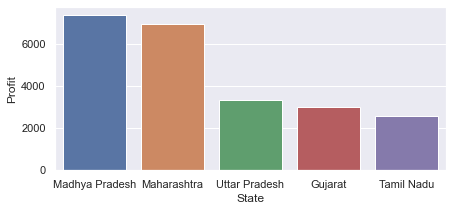

In [31]:
sns.barplot(y='Profit',x='State',data=state_prof.head())
sns.set(rc={'figure.figsize':(7,5)})

### Top 5 States by Amount

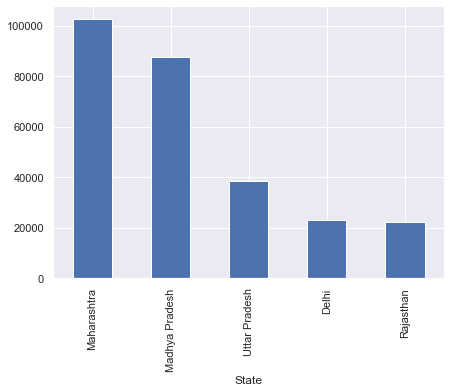

In [35]:
df.groupby('State')['Amount'].sum().nlargest(5).sort_values(ascending=False).plot(kind='bar')
ylabel
sns.set(rc={'figure.figsize':(5,3)})

#### MP, Maharastra, UP, Gujarat & Tamil Nadu has the highest sales.
#### But Delhi & Rajasthan replaces Gujarat & Tamil Nadu in terms of most profit.

## Payment Mode

<AxesSubplot:xlabel='PaymentMode', ylabel='count'>

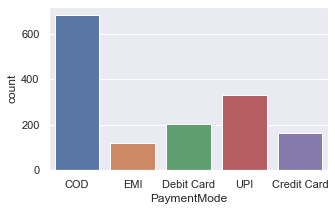

In [36]:
sns.countplot(x='PaymentMode',data=df)

In [37]:
paymode=df.groupby(['PaymentMode'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [38]:
paymode

,PaymentMode,Amount
0,COD,155181
1,Credit Card,86932
3,EMI,77881
4,UPI,68641
2,Debit Card,49136


<AxesSubplot:xlabel='PaymentMode', ylabel='Amount'>

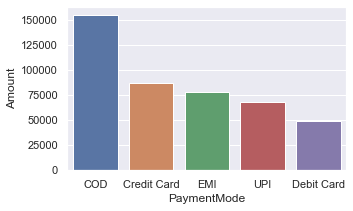

In [40]:
sns.barplot(x='PaymentMode',y='Amount',data=paymode)

#### COD is the most used mode of payment followed by Credit Card.

## Category

<AxesSubplot:xlabel='Category', ylabel='count'>

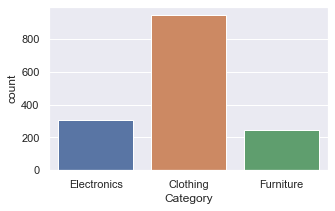

In [41]:
sns.countplot(x='Category',data=df)

### Category by Quantity

In [47]:
ctgry_qty=df.groupby(['Category'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
ctgry_qty

,Category,Quantity
0,Clothing,3516
1,Electronics,1154
2,Furniture,945


<AxesSubplot:xlabel='Category', ylabel='Quantity'>

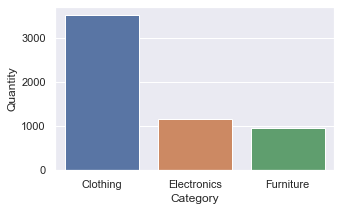

In [48]:
sns.barplot(x='Category',y='Quantity',data=ctgry_qty)

### Category by Amount

In [49]:
ctgry_amt=df.groupby(['Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ctgry_amt

,Category,Amount
1,Electronics,166267
0,Clothing,144323
2,Furniture,127181


<AxesSubplot:xlabel='Category', ylabel='Amount'>

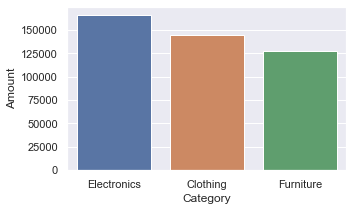

In [50]:
sns.barplot(x='Category',y='Amount',data=ctgry_amt)

### Category by Profit

In [51]:
ctgry_prft=df.groupby(['Category'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)
ctgry_prft

,Category,Profit
0,Clothing,13325
1,Electronics,13162
2,Furniture,10476


<AxesSubplot:xlabel='Category', ylabel='Profit'>

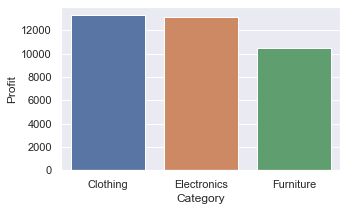

In [52]:
sns.barplot(x='Category',y='Profit',data=ctgry_prft)

#### Clothing is the most ordered Category and has generated highest Profit.

## Sub-Category

In [53]:
sub_amt=df.groupby(['Sub-Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sub_amt

,Sub-Category,Amount
9,Printers,59252
10,Saree,59094
1,Bookcases,56861
8,Phones,46119
3,Electronic Games,39168
2,Chairs,34222
16,Trousers,30039
15,Tables,22614
0,Accessories,21728
13,Stole,18546


### Top 4 Products

<AxesSubplot:xlabel='Sub-Category', ylabel='Amount'>

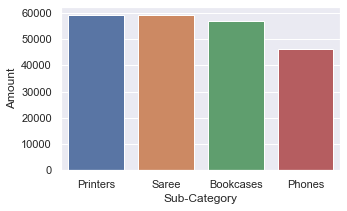

In [54]:
sns.barplot(x='Sub-Category',y='Amount',data=sub_amt.head(4))

#### Printers, Saree, Bookcases & Phones are the most sold products.

# Month

## Total Sales

In [60]:
df.groupby(['Month'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Month,Amount
0,1,68955
7,8,52509
9,10,48305
2,3,47491
10,11,41296
3,4,38800
8,9,26448
4,5,24943
11,12,24151
1,2,22638


### Top 5 Months by Sales

<AxesSubplot:xlabel='Month'>

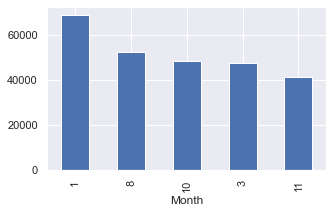

In [61]:
df.groupby('Month')['Amount'].sum().nlargest(5).sort_values(ascending=False).plot(kind='bar')

#### Highest sales are seen in the months of Jan, Aug, Oct, Mar and Nov

## Total Profit

In [62]:
df.groupby(['Month'],as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)

,Month,Profit
9,10,6495
2,3,6334
0,1,6287
7,8,6079
10,11,5603
1,2,5116
3,4,2928
8,9,1330
4,5,-102
5,6,-148


### Top 5 Months by Profit

<AxesSubplot:xlabel='Month'>

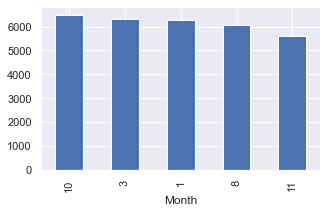

In [64]:
df.groupby('Month')['Profit'].sum().nlargest(5).sort_values(ascending=False).plot(kind='bar')

#### Most Profit generated in the months of Oct, Mar, Jan, Aug & Nov.

## City

In [63]:
cty_amt=df.groupby(['City'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
cty_amt

,City,Amount
10,Indore,63680
17,Mumbai,58886
20,Pune,43612
16,Mathura,28747
3,Bhopal,23783
6,Delhi,22957
4,Chandigarh,21142
0,Ahmedabad,14543
14,Kolkata,14328
23,Thiruvananthapuram,13871


### Top 5 Cities

<AxesSubplot:xlabel='City', ylabel='Amount'>

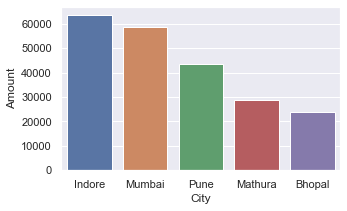

In [65]:
sns.barplot(x='City',y='Amount',data=cty_amt.head())

# Conclusion

1. Madhya Pradesh, Maharashtra, Uttar Pradesh, Gujarat, and Tamil Nadu emerge as the states with the highest sales, But Delhi & Rajasthan replaces Gujarat & Tamil Nadu in terms profit generation. 
2. Cash on delivery remains the dominant payment mode, closely followed by credit cards.
3. Clothing is the most ordered Category and has generated highest Profit.
4. Printers, sarees, bookcases, and phones are among the top-selling products.
5. The best months for *sales* and making *profits* are January, August, October, March, and November.
6. Most of the buyers are from Indore, Mumbai, Pune, Mathura & Bhopal